### Adding white-noise channels or all-zeros channels to MNIST

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_lables), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

train_images_with_noise = np.concatenate(
    [train_images, np.random.random((60000, 28 * 28))], axis=1)

train_images_with_zeros_channel = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

### Training the same model on MNIST data with noise channels or all-zero channels



In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise, train_lables, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channel, train_lables, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6981 - loss: 1.0782 - val_accuracy: 0.9218 - val_loss: 0.2679
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9130 - loss: 0.2815 - val_accuracy: 0.9319 - val_loss: 0.2305
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9471 - loss: 0.1748 - val_accuracy: 0.9405 - val_loss: 0.1873
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.1150 - val_accuracy: 0.9567 - val_loss: 0.1468
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0856 - val_accuracy: 0.9629 - val_loss: 0.1255
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.0630 - val_accuracy: 0.9655 - val_loss: 0.1141
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0431 - val_accuracy: 0.9652 - val_loss: 0.1241
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0351 - val_accuracy: 0.

### Plotting a validation accuracy comparison



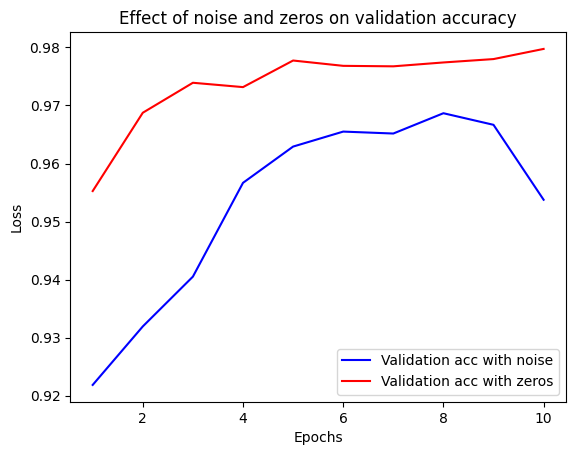

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b', label='Validation acc with noise')
plt.plot(epochs, val_acc_zeros, 'r', label='Validation acc with zeros')
plt.title('Effect of noise and zeros on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Fitting a MNIST model with randomly shuffled labels

In [4]:
(train_images, train_lables), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

random_train_labels = train_lables[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_random = model.fit(
    train_images,
    random_train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1023 - loss: 2.3303 - val_accuracy: 0.0988 - val_loss: 2.3062
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1219 - loss: 2.2962 - val_accuracy: 0.0974 - val_loss: 2.3110
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1288 - loss: 2.2885 - val_accuracy: 0.1041 - val_loss: 2.3217
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1395 - loss: 2.2761 - val_accuracy: 0.0990 - val_loss: 2.3259
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1555 - loss: 2.2599 - val_accuracy: 0.1039 - val_loss: 2.3392
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1722 - loss: 2.2386 - val_accuracy: 0.1037 - val_loss: 2.3463
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1880 - loss: 2.2120 - val_accuracy: 0.0971 - val_loss: 2.3734
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2028 - loss: 2.1869 - val_accuracy: 0.

### Training a MNIST model with an incorrectly high learning rate



In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4482 - loss: 4456.0801 - val_accuracy: 0.1953 - val_loss: 2.7014
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2124 - loss: 3.1036 - val_accuracy: 0.2027 - val_loss: 3.5874
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1953 - loss: 2.3697 - val_accuracy: 0.2202 - val_loss: 2.3652
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2088 - loss: 2.3054 - val_accuracy: 0.1663 - val_loss: 2.1877
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2072 - loss: 2.4261 - val_accuracy: 0.1653 - val_loss: 2.3621
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2005 - loss: 2.3472 - val_accuracy: 0.2175 - val_loss: 4.1490
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2143 - loss: 2.5643 - val_accuracy: 0.2017 - val_loss: 2.2620
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2109 - loss: 2.3788 - val_accuracy:

### The same model with a more appropriate learning rate

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8407 - loss: 0.8150 - val_accuracy: 0.9652 - val_loss: 0.1186
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9644 - loss: 0.1254 - val_accuracy: 0.9678 - val_loss: 0.1229
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0924 - val_accuracy: 0.9649 - val_loss: 0.1489
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9804 - loss: 0.0738 - val_accuracy: 0.9700 - val_loss: 0.1480
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9833 - loss: 0.0676 - val_accuracy: 0.9685 - val_loss: 0.1598
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9859 - loss: 0.0533 - val_accuracy: 0.9688 - val_loss: 0.1855
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.0486 - val_accuracy: 0.9717 - val_loss: 0.1768
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0456 - val_accuracy: 0.

### A simple logistic regression on MNIST



In [7]:
model = keras.Sequential([layers.Dense(10,activation="softmax")])
model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
history_small_model = model.fit(train_images, train_labels,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7425 - loss: 1.0424 - val_accuracy: 0.9038 - val_loss: 0.3582
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8969 - loss: 0.3733 - val_accuracy: 0.9123 - val_loss: 0.3118
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9117 - loss: 0.3205 - val_accuracy: 0.9208 - val_loss: 0.2920
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9173 - loss: 0.2987 - val_accuracy: 0.9209 - val_loss: 0.2828
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9178 - loss: 0.2930 - val_accuracy: 0.9233 - val_loss: 0.2780
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9214 - loss: 0.2854 - val_accuracy: 0.9258 - val_loss: 0.2755
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9216 - loss: 0.2782 - val_accuracy: 0.9242 - val_loss: 0.2727
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9232 - loss: 0.2776 - val_accuracy: 0.

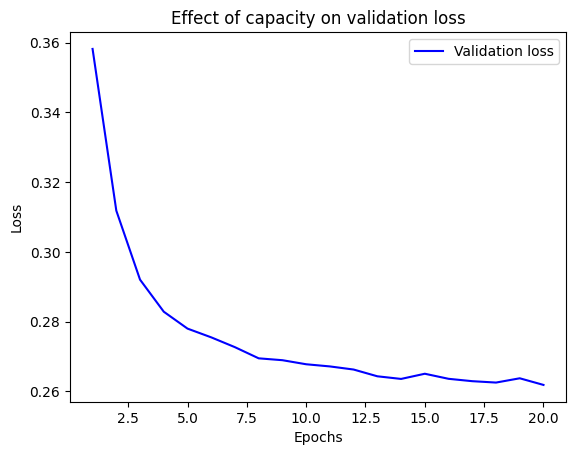

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Effect of capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="relu"),
])

model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2341 - loss: 2.5666 - val_accuracy: 0.0995 - val_loss: 2.3024
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1035 - loss: 2.2987 - val_accuracy: 0.1020 - val_loss: 2.2968
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1014 - loss: 2.2940 - val_accuracy: 0.1694 - val_loss: 2.1732
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1382 - loss: 2.2213 - val_accuracy: 0.1058 - val_loss: 2.2880
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1034 - loss: 2.2876 - val_accuracy: 0.1289 - val_loss: 2.2358
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1140 - loss: 2.2645 - val_accuracy: 0.1261 - val_loss: 2.2414
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1201 - loss: 2.2477 - val_accuracy: 0.1080 - val_loss: 2.2830
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1104 - loss: 2.2739 - val_accuracy: 0.

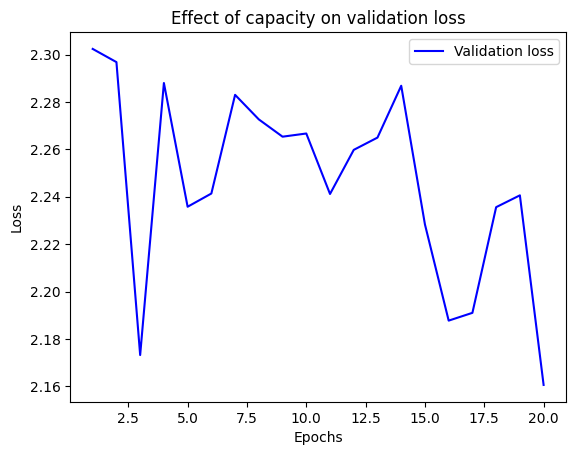

In [10]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Effect of capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Improving generalization


In [22]:
# original model

from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6771 - loss: 0.5981 - val_accuracy: 0.8360 - val_loss: 0.4116
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8849 - loss: 0.3374 - val_accuracy: 0.8719 - val_loss: 0.3265
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9256 - loss: 0.2372 - val_accuracy: 0.8922 - val_loss: 0.2808
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9388 - loss: 0.1904 - val_accuracy: 0.8936 - val_loss: 0.2752
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9499 - loss: 0.1542 - val_accuracy: 0.8794 - val_loss: 0.3026
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9553 - loss: 0.1350 - val_accuracy: 0.8888 - val_loss: 0.2862
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9692 - loss: 0.1119 - val_accuracy: 0.8836 - val_loss: 0.3072
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9727 - loss: 0.0962 - val_accuracy: 0.8852 - v

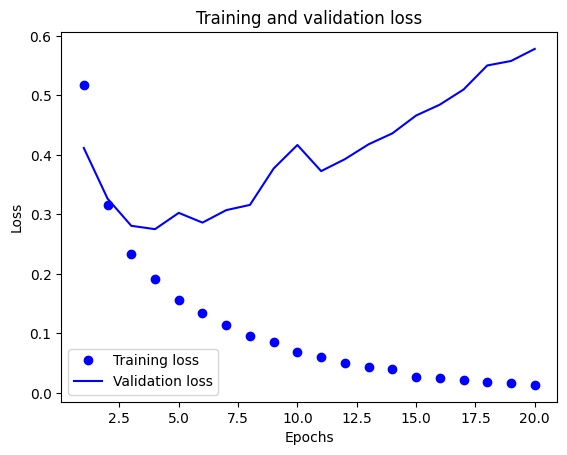

In [23]:
# acc and loss plot
history_dict = history_original.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

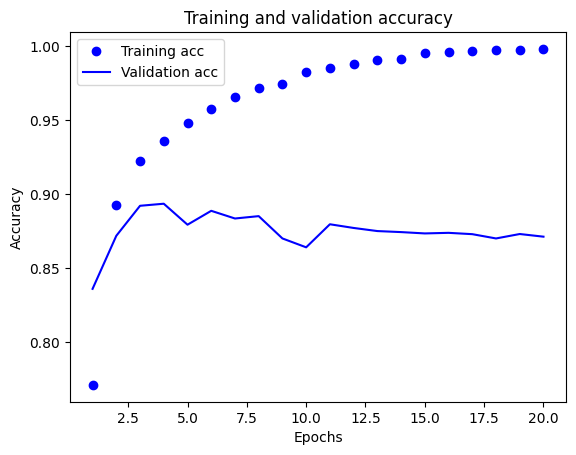

In [24]:
plt.clf()
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Version of the model with lower capacity



In [25]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

history_smaller_model = model.fit(train_data, train_labels,
                            epochs=20,
                            batch_size=512,
                            validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6131 - loss: 0.6644 - val_accuracy: 0.7171 - val_loss: 0.5904
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7727 - loss: 0.5604 - val_accuracy: 0.8239 - val_loss: 0.5337
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8432 - loss: 0.4984 - val_accuracy: 0.8128 - val_loss: 0.4892
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8789 - loss: 0.4422 - val_accuracy: 0.8532 - val_loss: 0.4310
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9071 - loss: 0.3728 - val_accuracy: 0.8805 - val_loss: 0.3745
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9260 - loss: 0.3098 - val_accuracy: 0.8830 - val_loss: 0.3406
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9317 - loss: 0.2699 - val_accuracy: 0.8841 - val_loss: 0.3140
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9369 - loss: 0.2306 - val_accuracy: 0.8881 - v

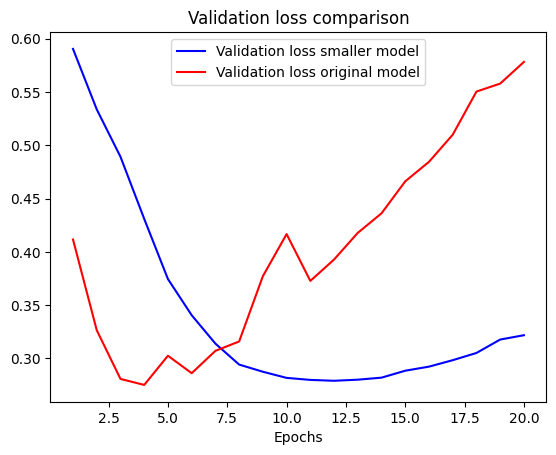

In [26]:
# loss orginal vs smaller model
history_dict = history_smaller_model.history
history_org = history_original.history
loss = history_dict["loss"]
lost_org = history_org["loss"]
val_loss = history_dict["val_loss"]
val_loss_org = history_org["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss smaller model")
plt.plot(epochs, val_loss_org, "r", label="Validation loss original model")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Version of the model with higher capacity



In [27]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
history_larger_model = model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.6734 - loss: 0.6592 - val_accuracy: 0.6426 - val_loss: 0.6879
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8518 - loss: 0.3632 - val_accuracy: 0.8874 - val_loss: 0.2813
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9053 - loss: 0.2449 - val_accuracy: 0.8892 - val_loss: 0.2723
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9298 - loss: 0.1852 - val_accuracy: 0.8820 - val_loss: 0.2960
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9449 - loss: 0.1491 - val_accuracy: 0.8865 - val_loss: 0.3057
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9588 - loss: 0.1194 - val_accuracy: 0.8824 - val_loss: 0.3078
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9764 - loss: 0.0802 - val_accuracy: 0.8844 - val_loss: 0.3461
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9854 - loss: 0.0541 - val_accuracy: 0.8840 - v

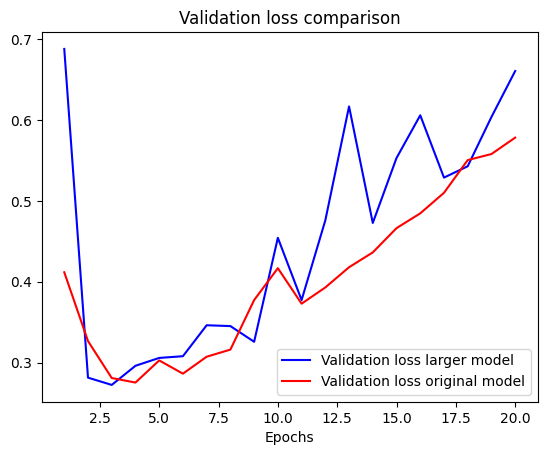

In [28]:
# loss orginal vs larger model

history_dict = history_larger_model.history
history_org = history_original.history
loss = history_dict["loss"]
lost_org = history_org["loss"]
val_loss = history_dict["val_loss"]
val_loss_org = history_org["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss larger model")
plt.plot(epochs, val_loss_org, "r", label="Validation loss original model")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Adding L2 weight regularization to the model



In [29]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

history_l2 = model.fit(train_data, train_labels,
                        epochs=20,
                        batch_size=512,
                        validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6956 - loss: 0.6417 - val_accuracy: 0.8715 - val_loss: 0.4246
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8920 - loss: 0.3782 - val_accuracy: 0.8771 - val_loss: 0.3633
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9178 - loss: 0.2963 - val_accuracy: 0.8742 - val_loss: 0.3562
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9320 - loss: 0.2535 - val_accuracy: 0.8891 - val_loss: 0.3272
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9415 - loss: 0.2251 - val_accuracy: 0.8796 - val_loss: 0.3496
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9451 - loss: 0.2130 - val_accuracy: 0.8721 - val_loss: 0.3784
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9509 - loss: 0.2039 - val_accuracy: 0.8846 - val_loss: 0.3430
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9611 - loss: 0.1818 - val_accuracy: 0.8732 - v

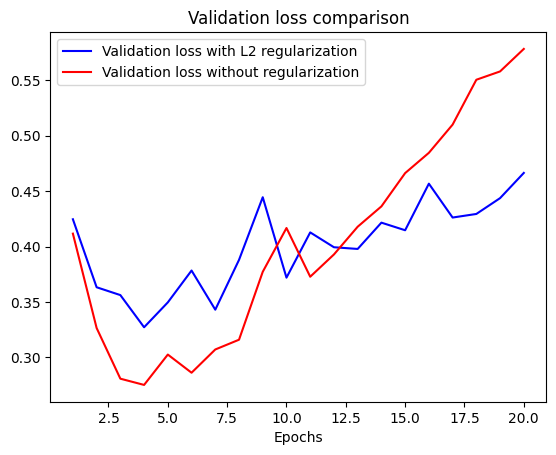

In [30]:
# val loss comparison
history_dict = history_l2.history
history_org = history_original.history
val_loss = history_dict["val_loss"]
val_loss_org = history_org["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss with L2 regularization")
plt.plot(epochs, val_loss_org, "r", label="Validation loss without regularization")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Adding dropout to the IMDB model



In [31]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

history_dropout = model.fit(train_data, train_labels,
                            epochs=20,
                            batch_size=512,
                            validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.6011 - loss: 0.6566 - val_accuracy: 0.8185 - val_loss: 0.5101
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7523 - loss: 0.5308 - val_accuracy: 0.8731 - val_loss: 0.4044
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8294 - loss: 0.4305 - val_accuracy: 0.8757 - val_loss: 0.3476
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8629 - loss: 0.3670 - val_accuracy: 0.8897 - val_loss: 0.3045
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8862 - loss: 0.3237 - val_accuracy: 0.8893 - val_loss: 0.2904
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9028 - loss: 0.2785 - val_accuracy: 0.8889 - val_loss: 0.2755
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9181 - loss: 0.2471 - val_accuracy: 0.8792 - val_loss: 0.2877
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9316 - loss: 0.2141 - val_accuracy: 0.8905 - 

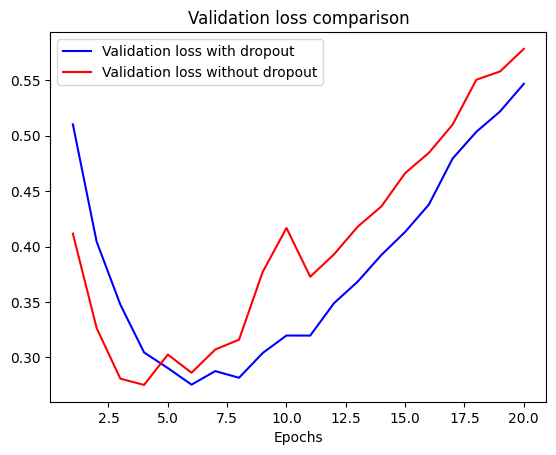

In [32]:
# val loss comparison
history_dict = history_dropout.history
history_org = history_original.history

val_loss = history_dict["val_loss"]
val_loss_org = history_org["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b", label="Validation loss with dropout")
plt.plot(epochs, val_loss_org, "r", label="Validation loss without dropout")
plt.title("Validation loss comparison")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [32]:
# DOUBLE BAM